In [1]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [147]:
sns.set_style('whitegrid')
sns.set_palette("deep")
sns.color_palette("deep", n_colors=11)

sns.set_theme(style='whitegrid')

In [148]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.original

A peak of the top 10 rows of the data.

In [149]:
display(X.head(10))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

Checking the column names of the data. This includes possible features and target for machine learning.

In [150]:
print(f'Columns: \n{X.columns}\n')
print(f'Shape: {X.shape}\n')
print(f'Info: \n{X.info()}\n')

Columns: 
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

Shape: (6497, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol    

Quick checking of statistics of data. Adding parameter include='all' to also see statistics for color -- which is a categorical data.

In [151]:
X.describe(include='all').T

count unique    top  freq        mean        std  \
fixed_acidity         6497.0    NaN    NaN   NaN    7.215307   1.296434   
volatile_acidity      6497.0    NaN    NaN   NaN    0.339666   0.164636   
citric_acid           6497.0    NaN    NaN   NaN    0.318633   0.145318   
residual_sugar        6497.0    NaN    NaN   NaN    5.443235   4.757804   
chlorides             6497.0    NaN    NaN   NaN    0.056034   0.035034   
free_sulfur_dioxide   6497.0    NaN    NaN   NaN   30.525319    17.7494   
total_sulfur_dioxide  6497.0    NaN    NaN   NaN  115.744574  56.521855   
density               6497.0    NaN    NaN   NaN    0.994697   0.002999   
pH                    6497.0    NaN    NaN   NaN    3.218501   0.160787   
sulphates             6497.0    NaN    NaN   NaN    0.531268   0.148806   
alcohol               6497.0    NaN    NaN   NaN   10.491801   1.192712   
quality               6497.0    NaN    NaN   NaN    5.818378   0.873255   
color                   6497      2  white  4898         NaN        NaN   

                          min      25%      50%      75%      max  
fixed_acidity             3.8      6.4      7.0      7.7     15.9  
volatile_acidity         0.08     0.23     0.29      0.4     1.58  
citric_acid               0.0     0.25     0.31     0.39     1.66  
residual_sugar            0.6      1.8      3.0      8.1     65.8  
chlorides               0.009    0.038    0.047    0.065    0.611  
free_sulfur_dioxide       1.0     17.0     29.0     41.0    289.0  
total_sulfur_dioxide      6.0     77.0    118.0    156.0    440.0  
density               0.98711  0.99234  0.99489  0.99699  1.03898  
pH                       2.72     3.11     3.21     3.32     4.01  
sulphates                0.22     0.43     0.51      0.6      2.0  
alcohol                   8.0      9.5     10.3     11.3     14.9  
quality                   3.0      5.0      6.0      6.0      9.0  
color                     NaN      NaN      NaN      NaN      NaN

It can be observed that the scales vary for each feature. *chlorides* ranges from ~0.009-0.611 while *total_sulfur_dioxide* ranges from 6.0-440.0. It is obvious that proper scaling should be used later if we want to compare and visualize the data.

Visualizing the proportion of the count of the different quality. Note that using bar graph over pie chart to visualize proportions is a preference.
Here, it is observed that the majority of the quality score is centered on 6.0.

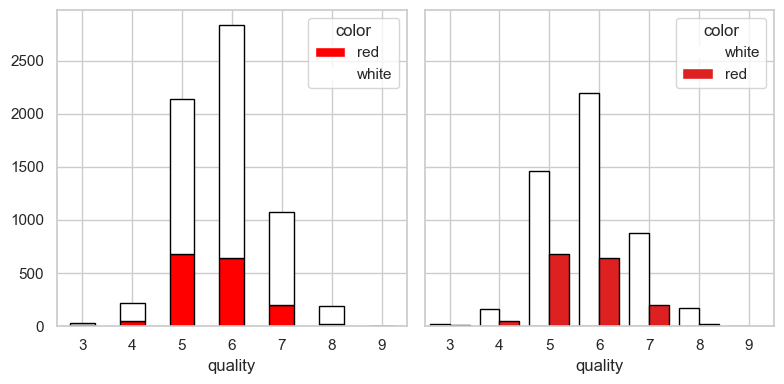

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

color_palette = {'red': 'red', 'white': 'white'}
df_to_view = X[['quality', 'color']].value_counts().reset_index()

(
    df_to_view
    .pivot(index='quality', columns='color', values='count')
    .plot(kind='bar', stacked=True, ax=ax[0], 
          color=[color_palette['red'], color_palette['white']])
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
plt.grid()

sns.barplot(
    data=df_to_view,
    x='quality',
    y='count',
    hue='color',
    ax=ax[1],
    palette=[color_palette['white'], color_palette['red']]
)
plt.grid()

for patch in ax[0].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

for patch in ax[1].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

plt.tight_layout()

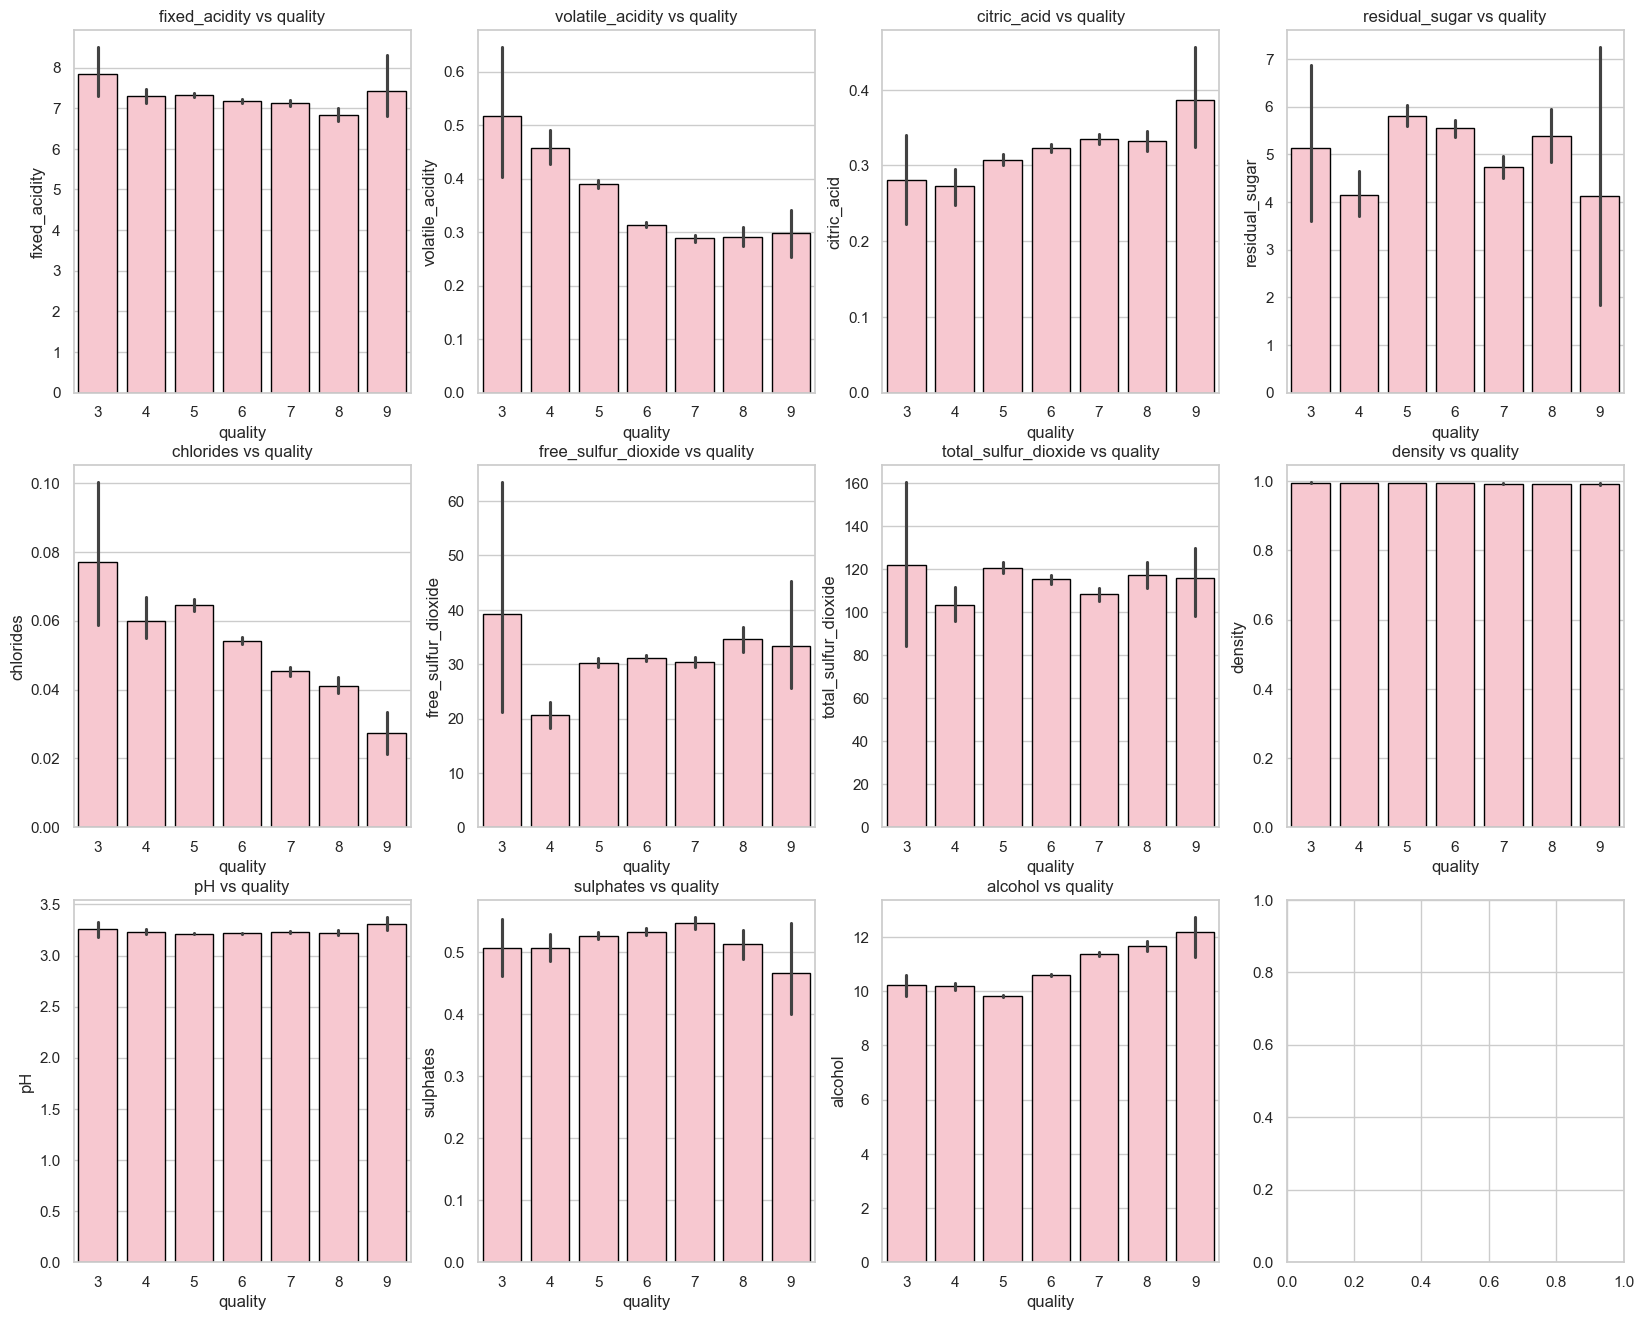

In [162]:
fig, ax = plt.subplots(3, 4, figsize=(20, 16))

for i, col_name in enumerate(X.columns[:-2]):
    row = i // 4
    col = i % 4
    sns.barplot(X, x='quality', y=col_name, ax=ax[row, col], color='pink')
    ax[row, col].set_title(f'{col_name} vs quality')
    
    for patch in ax[row, col].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

Above shows the mean with the error bar (the black wick) which represents the 95% confidence interval of the 11 features against the quality. Some initial insights that can be observed based on plots are the following:

| feature | if_feature | target | then_target |
| - | :- | :-: | -: |
| volatile_acidity | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ |
| citric_acid | $\color{green}{\uparrow}$ |  quality | $\color{green}{\uparrow}$ |
| chlorides | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ |
| alcohol | $\color{green}{\uparrow}$ | quality | $\color{green}{\uparrow}$ |

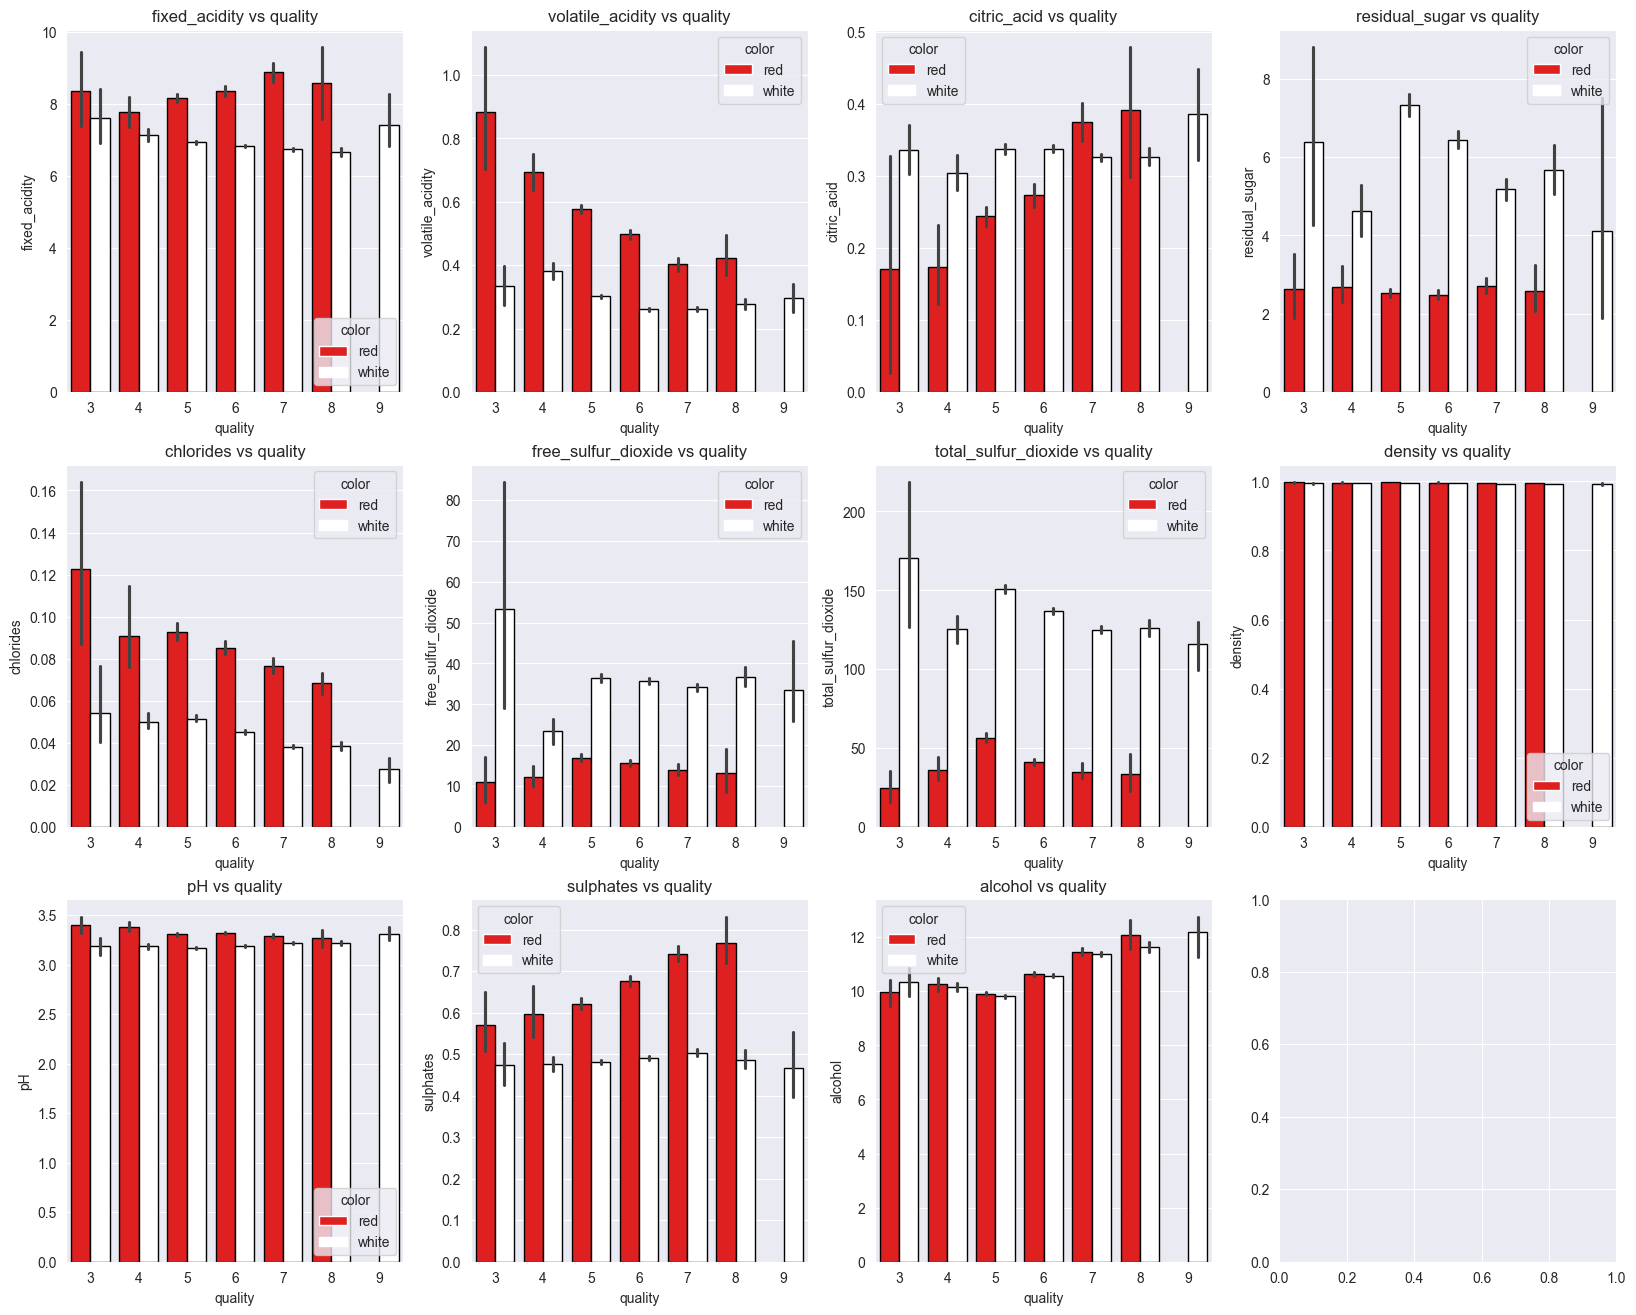

In [146]:
fig, ax = plt.subplots(3, 4, figsize=(20, 16))

for i, col_name in enumerate(X.columns[:-2]):
    row = i // 4
    col = i % 4
    sns.barplot(
        X, 
        x='quality', 
        y=col_name, 
        hue='color', 
        ax=ax[row, col],
        palette=[color_palette['red'], color_palette['white']]
    )
    for patch in ax[row, col].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    ax[row, col].set_title(f'{col_name} vs quality')

This shows the same plots but now show distinction for each color (red or white).

These observations are based from above but now with an added note.
| feature | if_feature | target | then_target | notes |
| - | :- | :-: | -: | -: |
| volatile_acidity | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ | Trend seems to only apply for color=red |
| citric_acid | $\color{green}{\uparrow}$ |  quality | $\color{green}{\uparrow}$ | Trend seems to only apply for color=red |
| chlorides | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ | Trend applies to both colors |
| alcohol | $\color{green}{\uparrow}$ | quality | $\color{green}{\uparrow}$ | Trend applies to both colors |

Although the purpose of the plot was to view different features against quality, obvious observations can be argued such as:
| feature | observation |
| - | :- |
| volatile_acidity | red > white |
| residual_sugar |  white > red |
| chlorides | red > white |
| free_sulfur_dioxide |  white > red |
| total_sulfur_dioxide |  white > red |
| sulphates | red > white |


An interesting observation here is that no color=red exists for quality=9. This is unsure if this is just due to lack of data (given the fact that quality=9 already has a low count).



<Figure size 1000x1000 with 0 Axes>

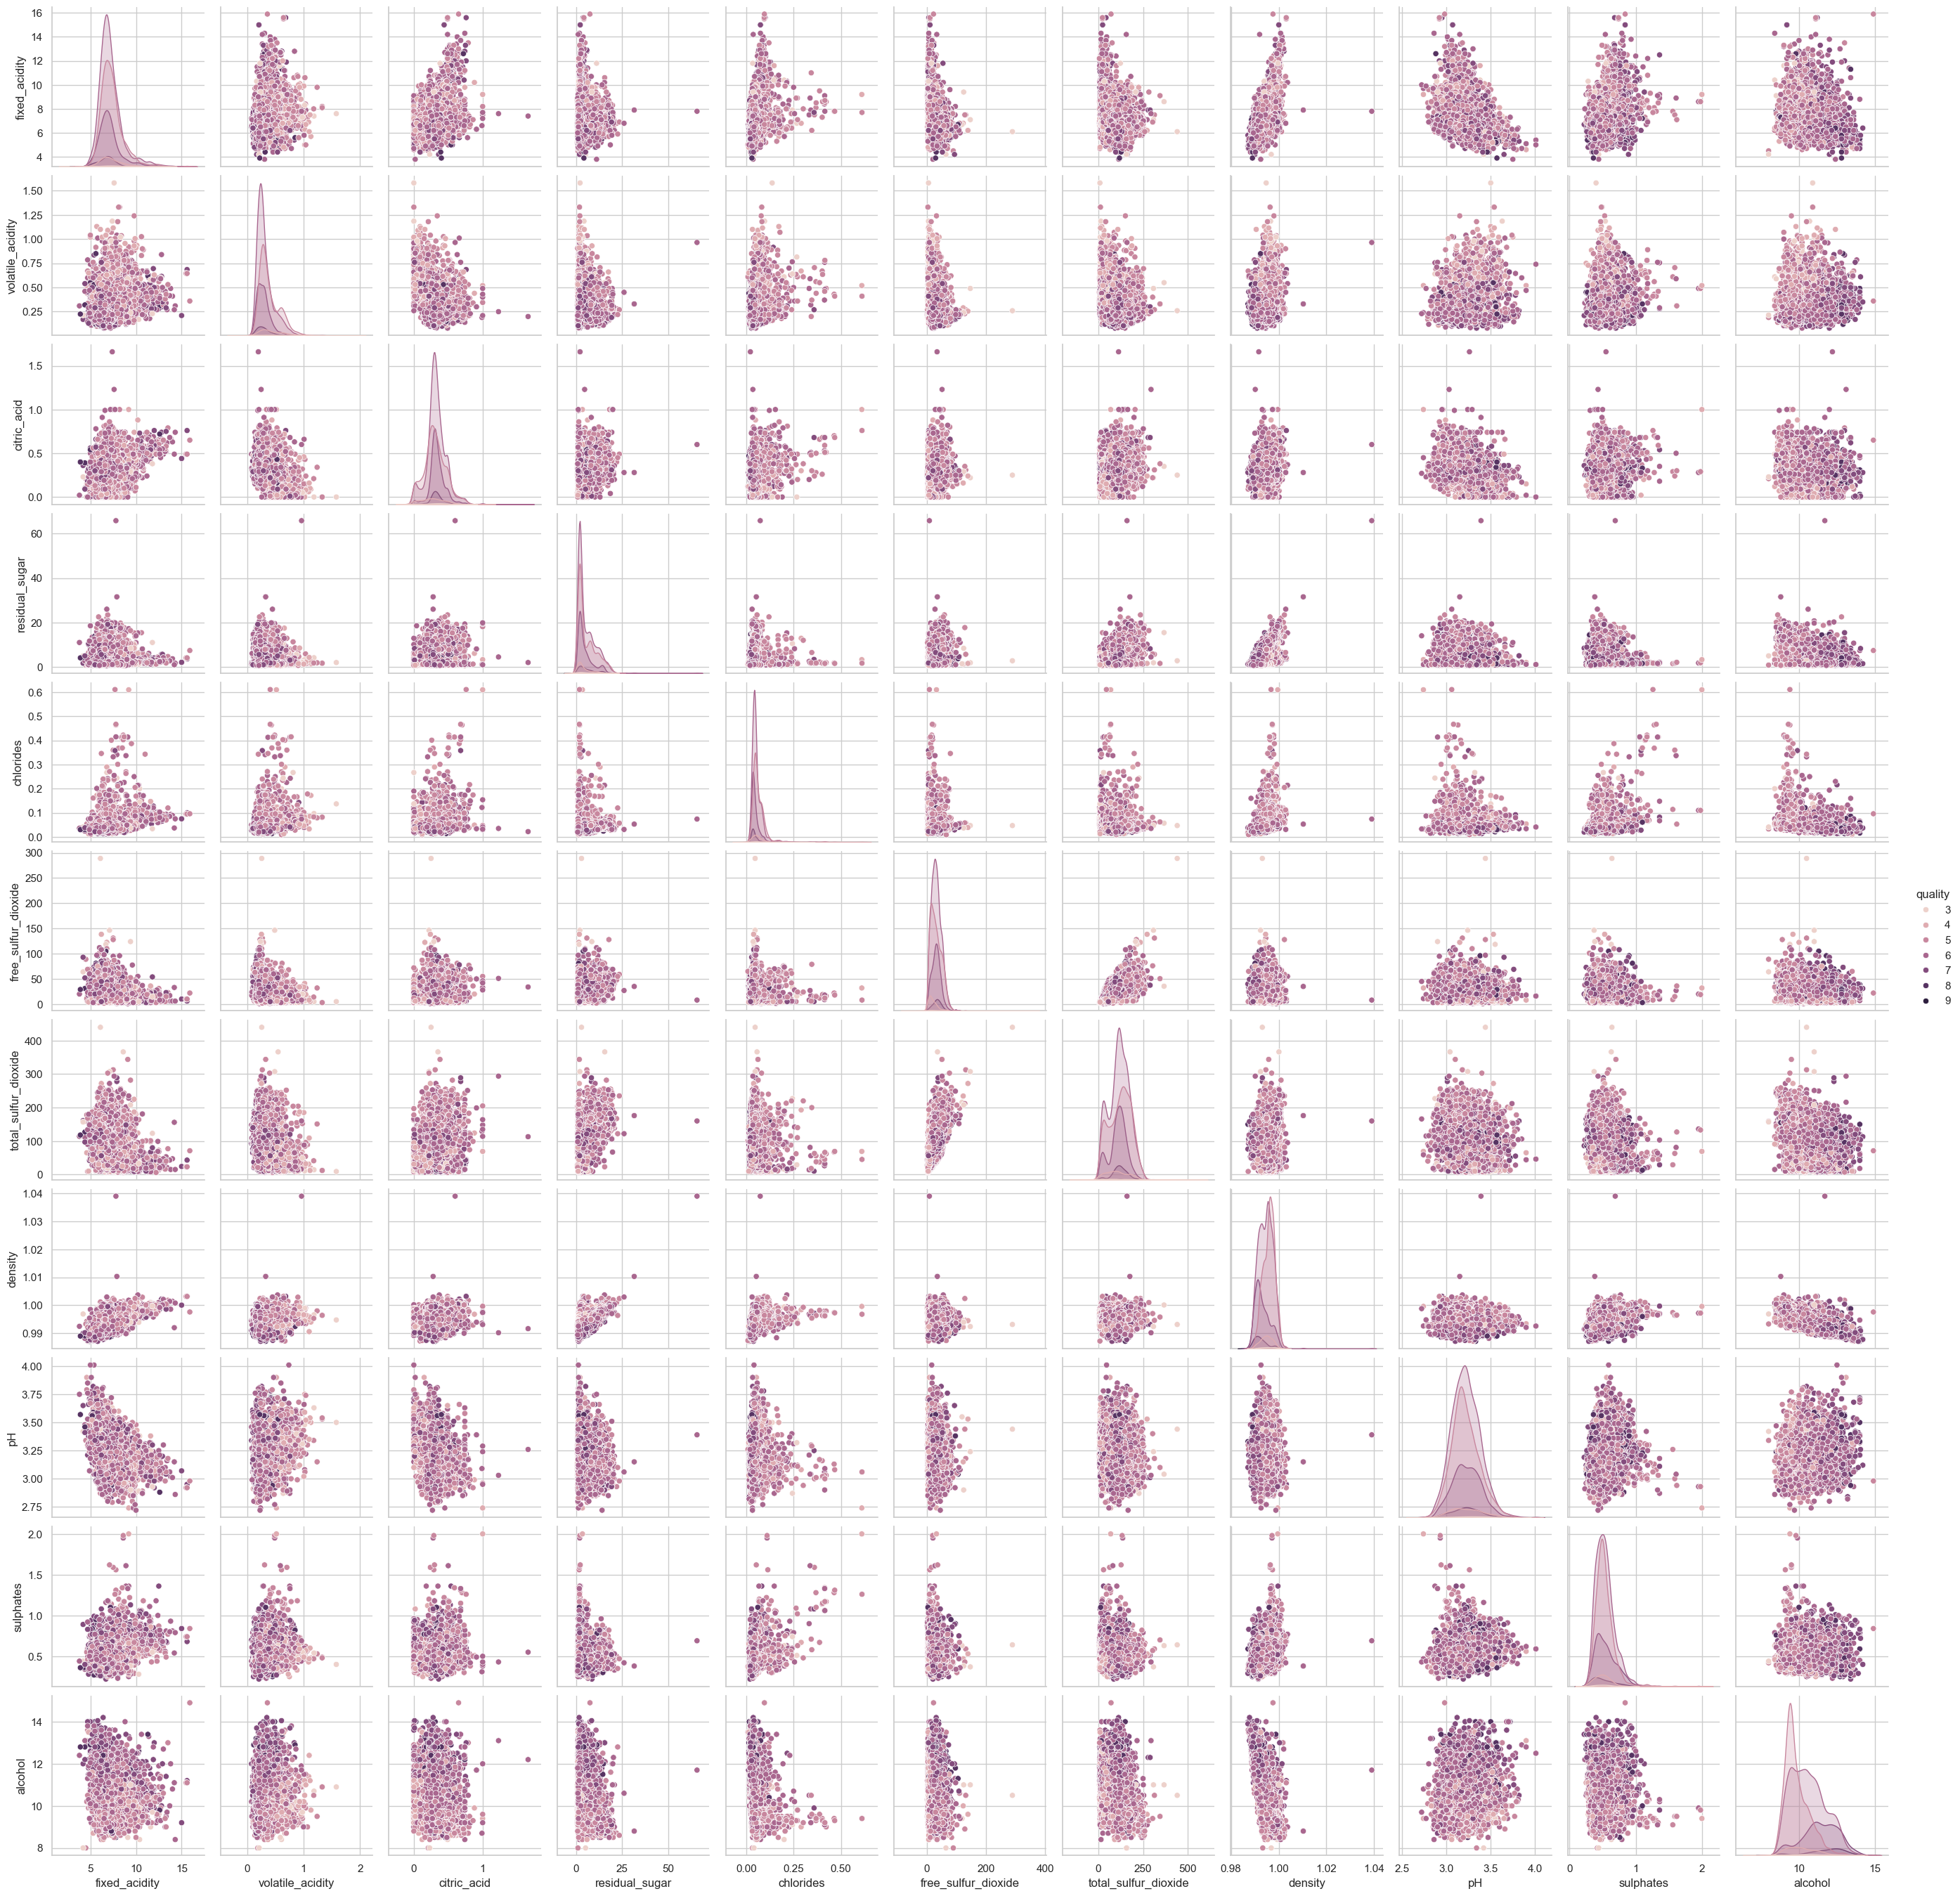

In [163]:
plt.figure(figsize=(10, 10))
sns.pairplot(X.drop('color', axis=1), hue='quality')

For each pair of features shown on a scatter plot, there seems to be little distinction for wines per quality score. But this could be somewhat misleading since it is know that majority of the wines have a score of {5, 6, 7}.

In [186]:
scaler = StandardScaler()
X2 = X.drop(['color', 'quality'], axis=1).copy()
X_scaled = scaler.fit_transform(X2)
X_scaled = pd.DataFrame(X_scaled, columns=X2.columns)
display(X_scaled)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   
...                   ...                   ...       ...       ...   
6492            -0.367664             -0.420128 -1.186161  0.320319   
6493             1.491697              0.924588  0.067824 -0.426067   
6494            -0.029599             -0.083949 -0.719251 -1.421248   
6495            -0.593041             -0.101642 -2.003251  0.755710   
6496            -0.480353             -0.313966 -1.763127  0.258120   

      sulphates   alcohol  
0      0.193097 -0.915464  
1      0.999579 -0.580068  
2      0.797958 -0.580068  
3      0.327510 -0.580068  
4      0.193097 -0.915464  
...         ...       ...  
6492  -0.210144  0.593818  
6493  -0.478971 -0.747766  
6494  -0.478971 -0.915464  
6495  -1.016626  1.935402  
6496  -1.419867  1.096912  

[6497 rows x 11 columns]

In [184]:
def generate_colors(n_colors, colormap_name='viridis'):
    cmap = plt.get_cmap(colormap_name)  # Choose a colormap
    colors = [cmap(i) for i in np.linspace(0, 1, n_colors)]  # Generate colors dynamically
    return colors


def raincloud_plot(dataframe, figsize=(25, 25)):
    fig, ax = plt.subplots(figsize=figsize)

    nrows = dataframe.shape[1]

    boxplots_colors = generate_colors(nrows)
    violin_colors = generate_colors(nrows)
    scatter_colors = generate_colors(nrows)

    # Boxplot
    bp = ax.boxplot(
        dataframe, 
        patch_artist=True, 
        vert=False, 
        widths=.15
    )

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Violinplot
    vp = ax.violinplot(
        dataframe,
        points=500, 
        showmeans=False, 
        showextrema=False, 
        showmedians=False, 
        vert=False,
        side='high'
    )

    for idx, b in enumerate(vp['bodies']):
        b.set_color(violin_colors[idx])
        b.set_edgecolor('black')


    # Scatterplot
    for idx, features in enumerate(dataframe):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(dataframe[features]), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.1, high=.1, size=len(idxs))
        y = out
        plt.scatter(dataframe[features], y, s=.3, color=scatter_colors[idx], 
                    alpha=0.3)

    plt.yticks(np.arange(1,nrows+1,1), dataframe.columns.to_list())
    plt.xlabel('Normalized Values')
    plt.title("Raincloud plot")
    plt.show()

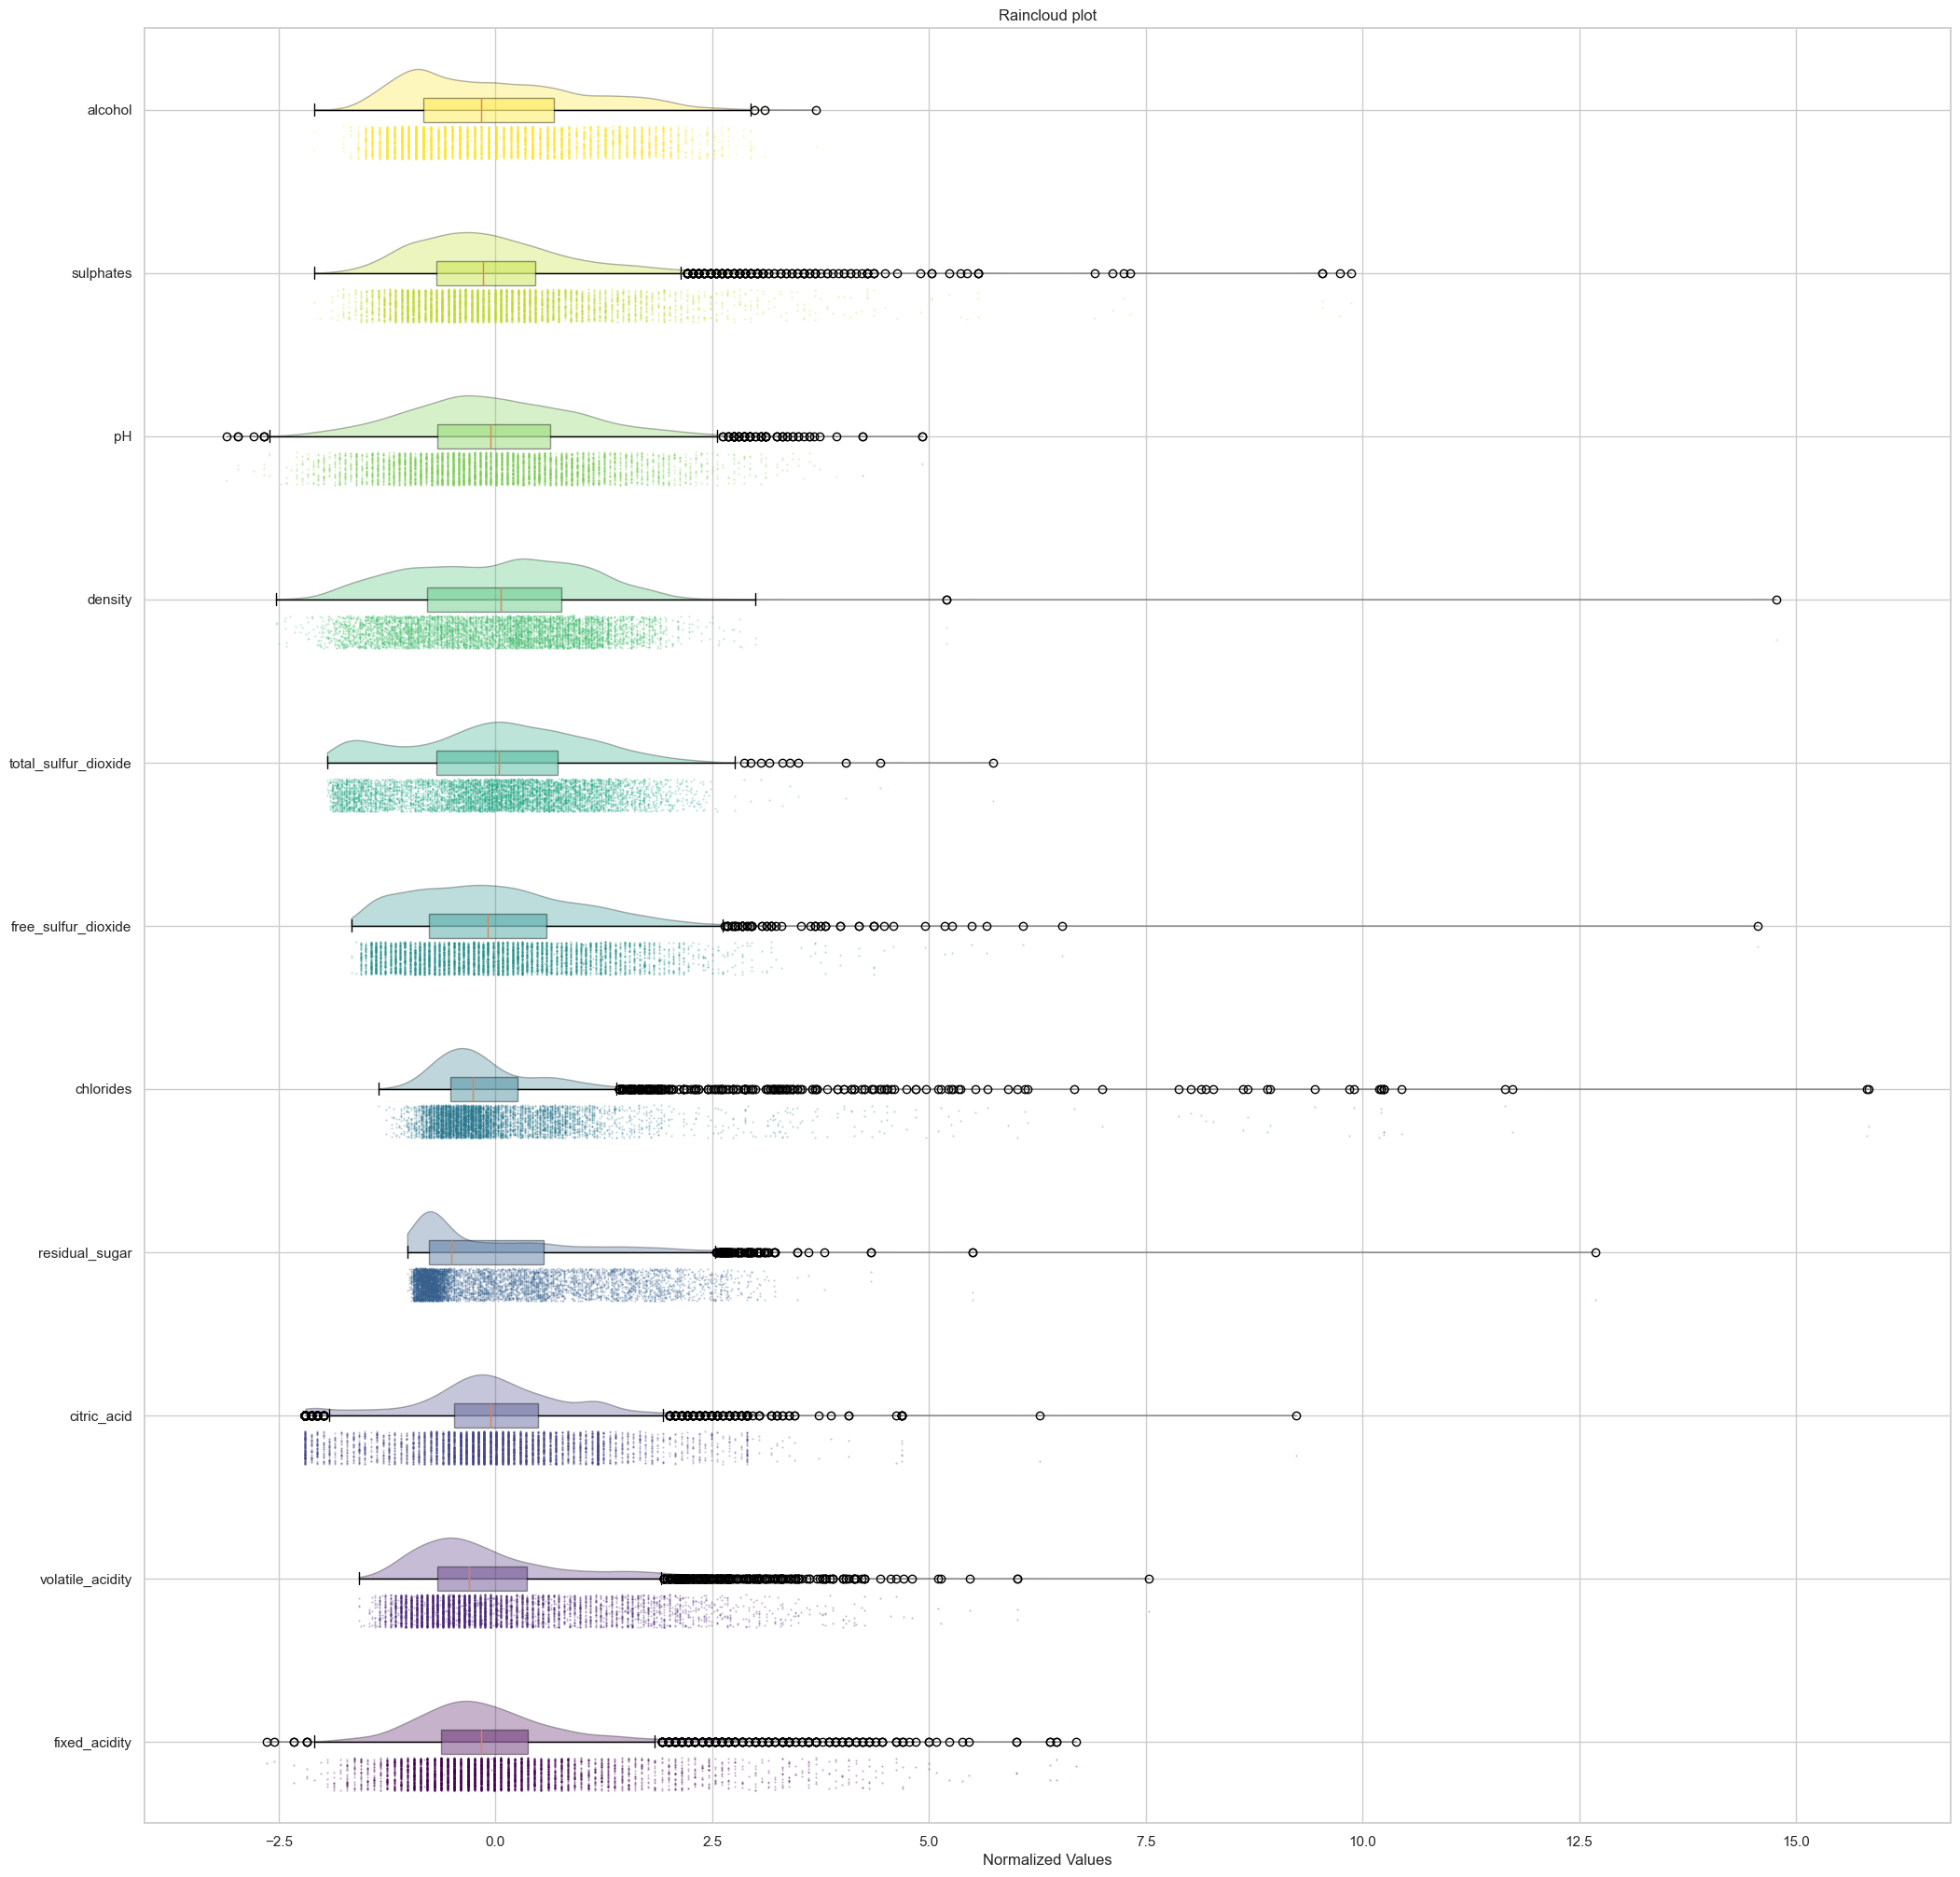

In [187]:
raincloud_plot(X_scaled)

Shown is a raincloud plot (a combination of top-side violin plot, box plot, and strip plot which appears as a rain cloud). This plot was chosen to visualize distribution together with the standard percentiles.

In [188]:
onehotencoder = OneHotEncoder(sparse_output=False)

ohe = onehotencoder.fit_transform(X[['color']])
ohe = pd.DataFrame(ohe, columns=onehotencoder.get_feature_names_out())
X1 = pd.concat([X, ohe], axis=1).drop(['color'], axis=1)

<Axes: >

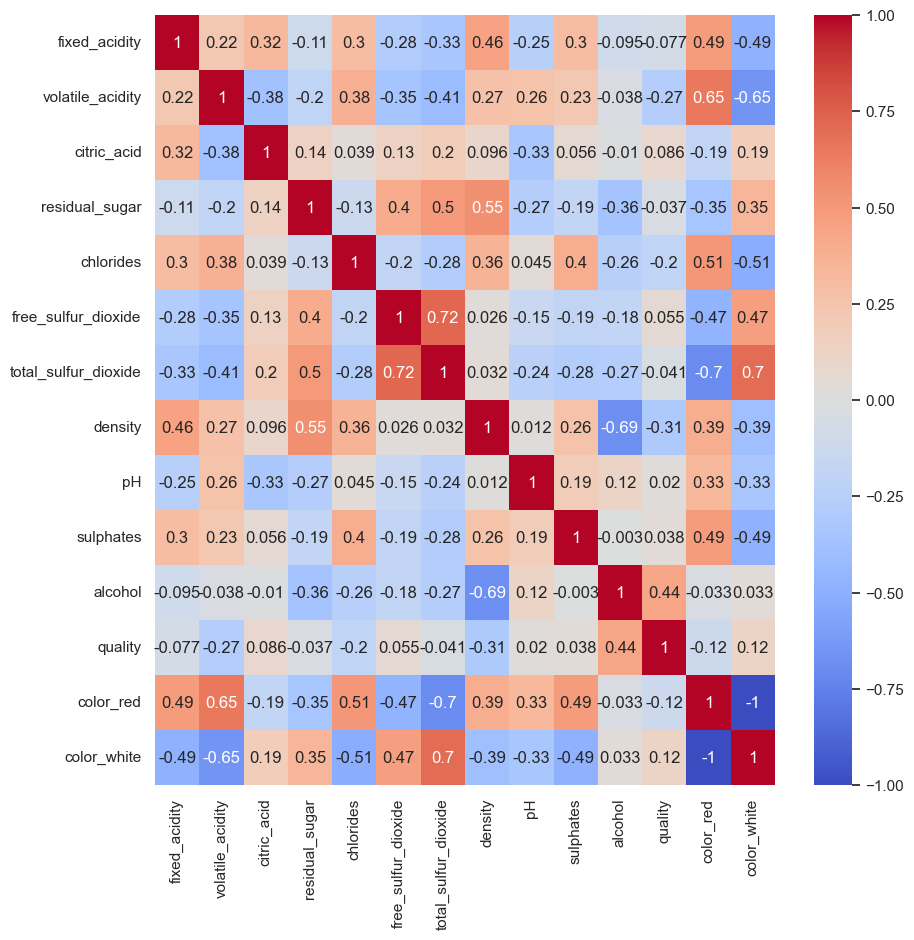

In [189]:
plt.figure(figsize=(10, 10))
sns.heatmap(X1.corr(), annot=True, cmap='coolwarm')

Shown is a heatmap of the correlation of the different features of the dataset to each other. Note here that normalized data does not affect correlation score since the standard deviations just cancel out each other. Pairs with noticeable correlation scores are total_sulfur_dioxide & free_sulfur_dioxide (positive correlation) and alcohol & density (negative correlation).

In [172]:
X_scaled['quality'] = X['quality']
melted_X = pd.melt(
    X_scaled,
    id_vars='quality',
    value_vars=X_scaled.columns
)
melted_X

quality       variable     value
0            5  fixed_acidity  0.142473
1            5  fixed_acidity  0.451036
2            5  fixed_acidity  0.451036
3            6  fixed_acidity  3.073817
4            5  fixed_acidity  0.142473
...        ...            ...       ...
71462        6        alcohol  0.593818
71463        5        alcohol -0.747766
71464        6        alcohol -0.915464
71465        7        alcohol  1.935402
71466        6        alcohol  1.096912

[71467 rows x 3 columns]

<Axes: xlabel='value', ylabel='variable'>

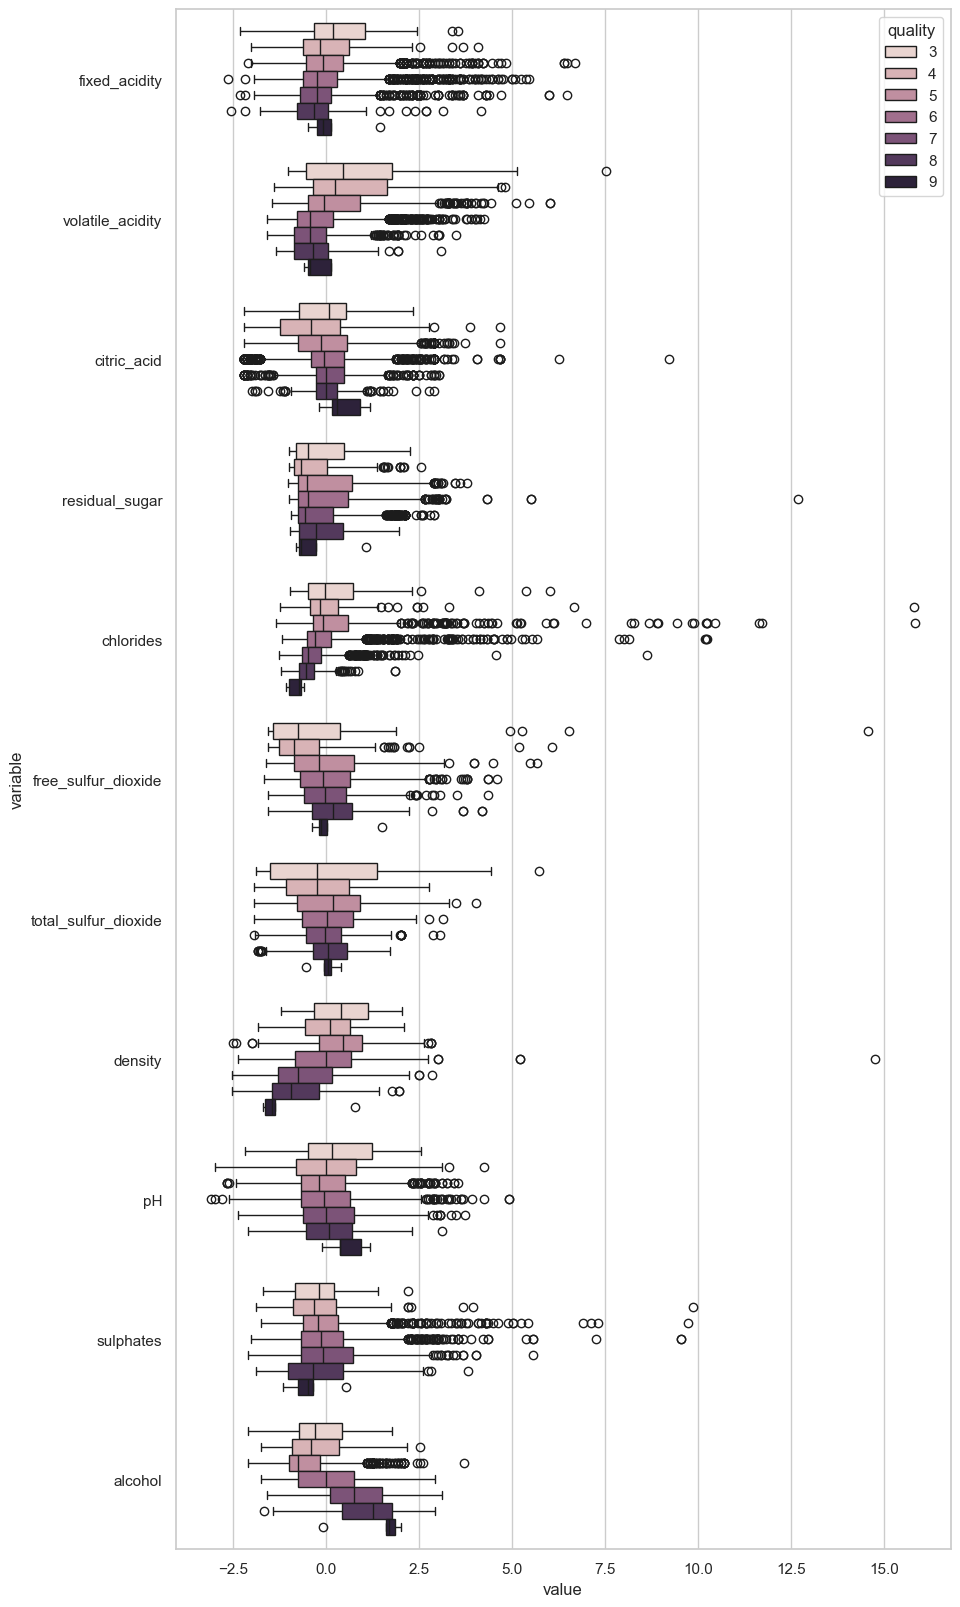

In [173]:
plt.figure(figsize=(10, 20))
sns.boxplot(
    data=melted_X,
    width=0.8,
    orient='h',
    x='value',
    y='variable',
    hue='quality'
)